# Proxyflow demo

### Fault scenarios recognition


Now we present simulations in faulted zones, that are ruled by another class, SimWithFault. 


In [9]:
### IMPORTS
import sys
sys.path.append('..')
import os
current_path = os.getcwd()
folder = os.path.abspath(os.path.join(current_path, os.pardir))
from classes.graph_simulation import SimWithFault
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
generate_MG_realisations = False 
run_modflow = True
build_graph = True

In this synthetic case, we chose to represent 3 faults. A simplified modelisation of faults conductivity is to assume that they can behave as a path (enhanced conductivity) or a barrier (reduced conductivity) for the contaminant. This leads us to $2^3 = 8$ fault scenarios.
 
To ensure variability of the results, we also choose 10 different locations of sources.
In the end, we have 80 different scenarios. Each scenario has an id, and in this case the place digit coresponds to the source location, the tens number to the fault scenario.

In [10]:
parameters = {'location_array':np.array([[2011.8216247 , 2950.46369633,  512.5       ],
       [1644.15961272, 2948.64944714,  512.5       ],
       [1811.83145201, 2423.32644897,  512.5       ],
       [2327.70259382, 2409.19913637,  512.5       ],
       [2049.59368767, 2027.55911324,  512.5       ],
       [2253.51310867, 2538.14331322,  512.5       ],
       [1829.7317165 , 2788.42870343,  512.5       ],
       [1803.19482929, 2453.49788948,  512.5       ],
       [1634.04169725, 2403.11298645,  512.5       ],
       [1703.45524068, 2262.31334044,  512.5       ]])}

sim = SimWithFault(data_path=os.path.join(folder,'data/fault_sim'), parameters_dict =parameters)
scenario = sim.instantiate_scenario(46)
sim.generate_sim_data()
sim.load_hydro_data(scenario)
print('#########################')
print('The different fault scenarios (1 corresponds to a preferential path, -1 to a barrier)')
print(sim.parameters_dict['fault_array'])
print('#########################')


2024-07-09 15:21:37.638231 - LOADING K FIELD
2024-07-09 15:21:37.638651 - LOADING MODFLOW RESULTS
#########################
The different fault scenarios (1 corresponds to a path, 0 to a barrier)
[[-1 -1 -1]
 [-1 -1  1]
 [-1  1 -1]
 [ 1 -1 -1]
 [-1  1  1]
 [ 1  1 -1]
 [ 1 -1  1]
 [ 1  1  1]]
#########################


We can visualise faults and source locations

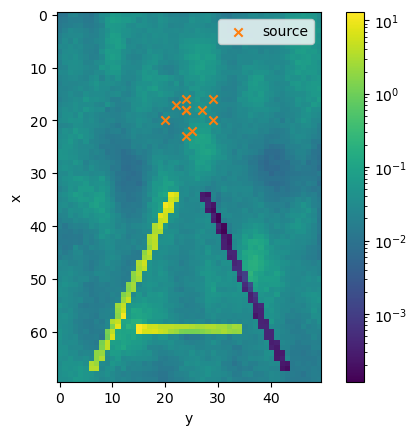

In [11]:
plt.imshow(np.sum(scenario.realK, axis = 2), norm=colors.LogNorm())
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.scatter(sim.parameters_dict['location_array'][:,1]//sim.dy,sim.parameters_dict['location_array'][:,0]//sim.dx, c= 'C1', marker = 'x', label = 'source')
plt.legend()

Now, we can execute the main function exactly as the precedent case.

In [12]:
sim.main(scenario, build_graph = build_graph, run_MODFLOW = run_modflow )

2024-07-09 15:21:55.223418 - LOADING K FIELD
2024-07-09 15:21:55.223811 - LOADING MODFLOW RESULTS
2024-07-09 15:21:55.246781 - BUILDING GRAPH
2024-07-09 15:21:55.246813 BUILDING GRAPH
Running topological_analysis version 0.1.19
2024-07-09 15:22:08.338429 GRAPH BUILT
2024-07-09 15:22:08.338515 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-09 15:22:08.562651 - DIJKSTRA COMPUTED
2024-07-09 15:22:08.562684 - END


Visualisation in 3D, see how both dijkstra paths and concentration are attracted by high conductivity pathways  :

In [5]:
# sim.plot_graph_3D(scenario, visu = 'notebook')

Fault recognition scenarios is ruled by CrossComparison class.

In [6]:
from classes.fault_recognition import  CrossComparison
sim = CrossComparison(data_path='/home/00113660/Documents/ProxyFlow/data/fault_sim', parameters_dict =parameters)

Looking at the variability of the distances distribution as a function of the fault scenarios, for a constant source location

/home/00113660/anaconda3/envs/loop/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


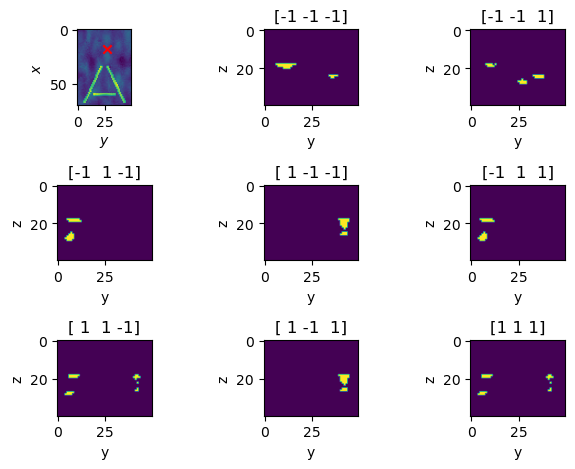

In [7]:
_ = sim.show_variability(6, show = 'distance')

Cross similarity scores between the cumulative mass of scenario 46 and the distances of scenarios 6, 16, 36, 46, 56, 66 and 76.

{0: 0.1271011860914565,
 1: 0.15346206414847455,
 2: 0.7841102048574116,
 3: 0.04617226492455618,
 4: 0.7841102048574116,
 5: 0.2904820502372428,
 6: 0.04617226492455618,
 7: 0.2904820502372428}

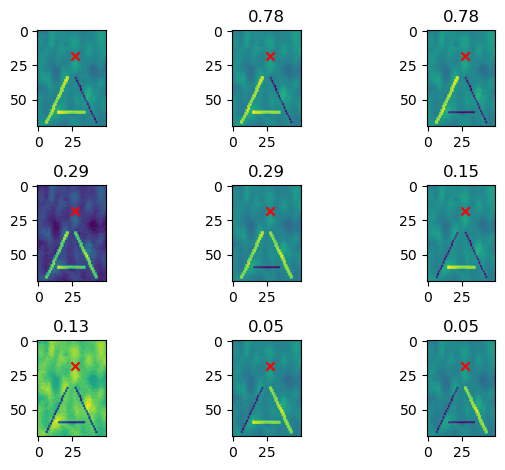

In [8]:
sim.compute_cross_comparison(scenario)